<a href="https://colab.research.google.com/github/zeyad-yasser1/l/blob/master/RegentMathG7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the file (update the path if needed)
df = pd.read_csv('RegentData.csv')

# Step 1: Convert scores to numeric
df['submissionScore'] = pd.to_numeric(df['submissionScore'], errors='coerce')
df['teacherScore'] = pd.to_numeric(df['teacherScore'], errors='coerce')

# Step 2: Drop rows where both teacherScore and submissionScore are missing
df = df.dropna(subset=['teacherScore', 'submissionScore'], how='all')

# Step 3: Ensure correct types for flags and levels
df['behavior_flag'] = df['behavior_flag'].astype(bool)
df['attendance_level'] = df['attendance_level'].fillna(0).astype(int)

# Step 4: Drop unnecessary columns for analysis
columns_to_keep = [
    'person_id', 'fullEnglishName', 'gender',
    'teacherScore', 'submissionScore', 'assessmentScore',
    'behavior_flag', 'attendance_level'
]
cleaned_df = df[columns_to_keep]



In [ ]:
import numpy as np

TOTAL_CONTENT_ITEMS = 20
opened_items = []

# Loop through and assign engagement based on pass status
for passed in df['passed_option2']:
    if passed:
        # Passed students more likely to open more content
        opened = np.random.randint(12, TOTAL_CONTENT_ITEMS + 1)
    else:
        # Failed students less likely to open content
        opened = np.random.randint(2, 13)
    opened_items.append(opened)

# Add to DataFrame
df['opened_content_items'] = opened_items
df['content_engagement_ratio'] = df['opened_content_items'] / TOTAL_CONTENT_ITEMS

# Preview
df[['passed_option2', 'opened_content_items', 'content_engagement_ratio']].head(10)


,passed_option2,opened_content_items,content_engagement_ratio
0,True,13,0.65
2,False,7,0.35
3,True,17,0.85
4,True,13,0.65
5,True,17,0.85
6,True,13,0.65
7,True,12,0.60
8,True,14,0.70
9,False,10,0.50
10,True,14,0.70


In [44]:
# Calculate Final Grade (weighted average)
df['Final Grade'] = (
    0.4 * df['submissionScore'].fillna(0) +
    0.4 * df['teacherScore'].fillna(0) +
    0.2 * df['assessmentScore'].fillna(0)
)

# Create pass/fail column based on Final Grade (threshold = 55)
df['Passed'] = df['Final Grade'] >= 65

# Preview results
df[['person_id', 'fullEnglishName','submissionScore', 'teacherScore', 'assessmentScore', 'Final Grade', 'attendance_level', 'behavior_flag', 'gender','Passed']].head(10)



,person_id,fullEnglishName,submissionScore,teacherScore,assessmentScore,Final Grade,attendance_level,behavior_flag,gender,Passed
0,c14155fbbbaf6467b7c2d56a,Youssef Tarek,75.54,45.39,51.44,58.660,3,False,male,False
2,a94b8d82c7e566c42f147881,Youssef Hussein,NaN,68.36,61.36,39.616,0,True,female,False
3,6986adfa12fad21b94312dce,Sophia Clark,93.93,50.93,81.53,74.250,0,False,male,True
4,3d92e0045c3386e3248ff78a,Mohamed Nassar,73.80,88.74,70.87,79.190,2,True,male,True
5,adb9b0afd2317221ed2f965f,Omar Yassin,96.29,66.59,67.52,78.656,0,False,female,True
6,5028e2cb81a849e52ad3ad62,Sara Fahmy,96.13,95.98,81.09,93.062,2,False,male,True
7,d6527e1cb8687ef93cbd05ac,Mohamed Tarek,77.04,57.50,41.53,62.122,0,False,male,False
8,38d99358960c0562ae730b61,Sara Ragab,64.09,73.61,86.40,72.360,0,False,male,True
9,0c7bef61c42b038973ac8a98,Emma Smith,NaN,53.90,59.95,33.550,0,False,male,False
10,52ec413b357807f2867d01e9,Mona Nassar,98.98,41.50,44.97,65.186,1,False,male,True


In [46]:
# Option 2 Pass/Fail Breakdown
option2_counts = df['passed_option2'].value_counts(normalize=True) * 100
print("✅ Option 2 (Weighted Final Score ≥ 65):")
print(option2_counts.rename({True: "Passed", False: "Failed"}).round(2))

print("\n")

# Option 3 Pass/Fail Breakdown
option3_counts = df['passed_option3'].value_counts(normalize=True) * 100
print("✅ Option 3 (Teacher Score ≥ 65):")
print(option3_counts.rename({True: "Passed", False: "Failed"}).round(2))


✅ Option 2 (Weighted Final Score ≥ 65):
passed_option2
Passed    84.71
Failed    15.29
Name: proportion, dtype: float64


✅ Option 3 (Teacher Score ≥ 65):
passed_option3
Passed    67.65
Failed    32.35
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


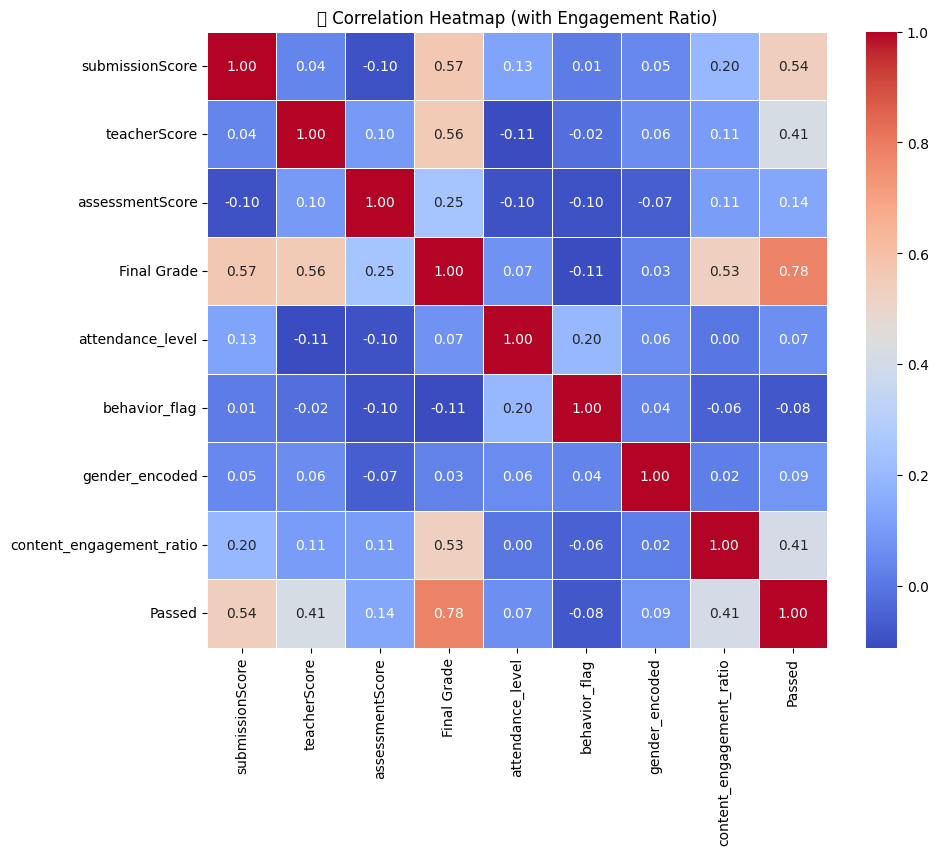

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode gender as numeric
df['gender_encoded'] = df['gender'].map({'male': 0, 'female': 1})

# Step 2: Select numeric columns for correlation analysis (including new column)
correlation_data = df[[
    'submissionScore', 'teacherScore', 'assessmentScore',
    'Final Grade', 'attendance_level', 'behavior_flag',
    'gender_encoded', 'content_engagement_ratio', 'Passed'
]]

# Step 3: Compute correlation matrix
corr_matrix = correlation_data.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Correlation Heatmap (with Engagement Ratio)')
plt.show()



In [43]:
# Absolute count
print("Class distribution (count):")
print(df['Passed'].value_counts())

# Percentage
print("\nClass distribution (%):")
print(df['Passed'].value_counts(normalize=True) * 100)


Class distribution (count):
Passed
False    155
True      15
Name: count, dtype: int64

Class distribution (%):
Passed
False    91.176471
True      8.823529
Name: proportion, dtype: float64


In [49]:
# Drop rows with any missing values in features
model_data = df[[
    'teacherScore', 'submissionScore', 'assessmentScore',
    'attendance_level', 'behavior_flag', 'gender_encoded',
    'content_engagement_ratio', 'Passed'
]].dropna()

# Features and target
features = model_data.drop(columns='Passed')
target = model_data['Passed'].astype(int)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Results
print("🌲 Random Forest Classifier:")
print(classification_report(y_test, rf_preds))

print("\n🧮 Logistic Regression:")
print(classification_report(y_test, log_preds))


🌲 Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.95      0.86      0.90        22

    accuracy                           0.87        31
   macro avg       0.84      0.88      0.85        31
weighted avg       0.89      0.87      0.87        31


🧮 Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [50]:
print("Train set label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set label distribution:")
print(y_test.value_counts(normalize=True))


Train set label distribution:
Passed
1    0.658333
0    0.341667
Name: proportion, dtype: float64

Test set label distribution:
Passed
1    0.709677
0    0.290323
Name: proportion, dtype: float64


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# ✅ Define features (excluding Final Grade to avoid data leakage)
features = [
    'teacherScore', 'submissionScore', 'assessmentScore',
    'attendance_level', 'behavior_flag', 'gender_encoded',
    'content_engagement_ratio'
]

# ✅ Drop rows with missing values and align target
X = df[features].dropna()
y = df.loc[X.index, 'Passed'].astype(int)

# ✅ Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_model = LogisticRegression(max_iter=1000)

# ✅ Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
log_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

# ✅ Print results
print("🌲 Random Forest 5-fold Accuracy: {:.2f}% ± {:.2f}%".format(rf_scores.mean() * 100, rf_scores.std() * 100))
print("🧮 Logistic Regression 5-fold Accuracy: {:.2f}% ± {:.2f}%".format(log_scores.mean() * 100, log_scores.std() * 100))


🌲 Random Forest 5-fold Accuracy: 92.69% ± 5.35%
🧮 Logistic Regression 5-fold Accuracy: 99.33% ± 1.33%


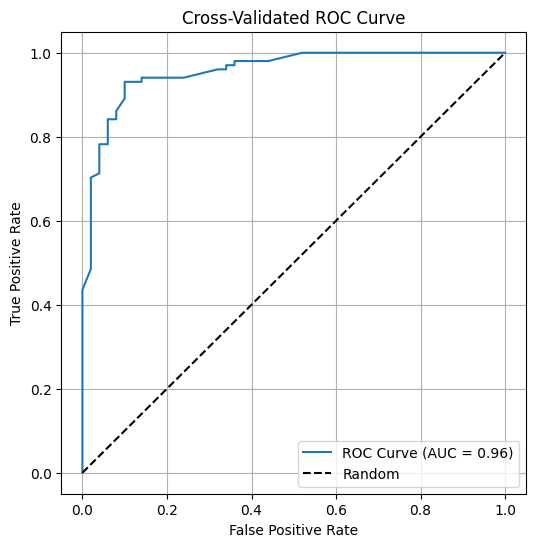

In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use the same features and labels
X = df[[
    'teacherScore', 'submissionScore', 'assessmentScore',
    'attendance_level', 'behavior_flag', 'gender_encoded',
    'content_engagement_ratio'
]].dropna()
y = df.loc[X.index, 'Passed'].astype(int)

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create stratified folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Predict probabilities for positive class (1)
y_pred_proba = cross_val_predict(rf_model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y, y_pred_proba)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cross-Validated ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
